# EDA

### check outliers
1. What are the decades with more accidents
2. Accidents and Fatalities per year
3. """" per decade
4. Operators with more accidents
5. Aircraft with more accidents (this will need to have the aircraft data cleaned)
6. 


In [38]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
df = pd.read_excel('plane_crash_info_cleaned.xlsx')
df.head()

,Date,Time,Location,Operator,Route,AC_Type,Summary,Passengers_Aboard,Crew_Aboard,Aboard_Aircraft,Passengers_Fatalities,Crew_Fatalities,Aboard_Fatalities,Ground_Fatalities,Total_Fatalites,Survivors,year
0,1908-09-17,17:18:00,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,"During a demonstration flight, a U.S. Army fly...",1.0,1.0,2.0,1.0,0.0,1.0,0.0,1.0,1.0,1908
1,1909-09-07,NaN,"Juvisy-sur-Orge, France",Unknown,Air show,Wright Byplane,Eugene Lefebvre was the first pilot to ever be...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1909
2,1912-07-12,06:30:00,"Atlantic City, New Jersey",Military - U.S. Navy,Test flight,Dirigible,First U.S. dirigible Akron exploded just offsh...,0.0,5.0,5.0,0.0,5.0,5.0,0.0,5.0,0.0,1912
3,1913-08-06,NaN,"Victoria, British Columbia, Canada",Private,Unknown,Curtiss seaplane,The first fatal airplane accident in Canada oc...,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1913
4,1913-09-09,18:30:00,Over the North Sea,Military - German Navy,Unknown,Zeppelin L-1 (airship),The airship flew into a thunderstorm and encou...,NaN,NaN,20.0,NaN,NaN,14.0,0.0,14.0,6.0,1913


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5063 entries, 0 to 5062
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   5063 non-null   datetime64[ns]
 1   Time                   3549 non-null   object        
 2   Location               5063 non-null   object        
 3   Operator               5063 non-null   object        
 4   Route                  5063 non-null   object        
 5   AC_Type                5063 non-null   object        
 6   Summary                5063 non-null   object        
 7   Passengers_Aboard      4840 non-null   float64       
 8   Crew_Aboard            4842 non-null   float64       
 9   Aboard_Aircraft        5046 non-null   float64       
 10  Passengers_Fatalities  4825 non-null   float64       
 11  Crew_Fatalities        4825 non-null   float64       
 12  Aboard_Fatalities      5055 non-null   float64       
 13  Gro

### percentage of missing values

In [41]:
missing_data = df.isnull().sum() / len(df) *100
missing_data.sort_values(ascending=False)

Time                     29.903219
Passengers_Fatalities     4.700770
Crew_Fatalities           4.700770
Passengers_Aboard         4.404503
Crew_Aboard               4.365001
Total_Fatalites           0.888801
Ground_Fatalities         0.888801
Survivors                 0.335769
Aboard_Aircraft           0.335769
Aboard_Fatalities         0.158009
Date                      0.000000
Summary                   0.000000
AC_Type                   0.000000
Route                     0.000000
Operator                  0.000000
Location                  0.000000
year                      0.000000
dtype: float64

In [42]:
df.describe()

,Passengers_Aboard,Crew_Aboard,Aboard_Aircraft,Passengers_Fatalities,Crew_Fatalities,Aboard_Fatalities,Ground_Fatalities,Total_Fatalites,Survivors,year
count,4840.000000,4842.000000,5046.000000,4825.000000,4825.000000,5055.000000,5018.000000,5018.000000,5046.000000,5063.000000
mean,26.869628,4.525816,31.097107,18.914819,3.583627,22.278932,1.714229,24.061977,8.792905,1971.069326
std,44.032148,3.789746,45.466616,34.139226,3.180857,35.079853,55.198520,66.411876,30.543587,24.772217
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1908.000000
25%,3.000000,2.000000,7.000000,1.000000,2.000000,4.000000,0.000000,4.000000,0.000000,1951.000000
50%,12.000000,4.000000,16.000000,7.000000,3.000000,11.000000,0.000000,12.000000,0.000000,1970.000000
75%,30.000000,6.000000,35.000000,21.000000,5.000000,25.000000,0.000000,26.000000,4.000000,1992.000000
max,614.000000,83.000000,644.000000,560.000000,43.000000,583.000000,2750.000000,2842.000000,516.000000,2023.000000


### Fatalities per Year

In [43]:
fatalities_by_year = df.groupby(by=['year']).sum()
fatalities_by_year['Total_Fatalites']

year
1908      1.0
1909      1.0
1912      5.0
1913     43.0
1915     36.0
        ...  
2019    326.0
2020    338.0
2021    189.0
2022    191.0
2023      0.0
Name: Total_Fatalites, Length: 113, dtype: float64

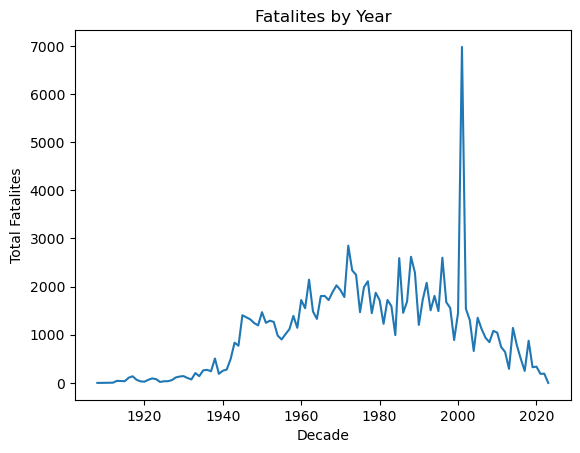

In [44]:
sns.lineplot(x=fatalities_by_year.index, y='Total_Fatalites', data=fatalities_by_year)
plt.xlabel('Decade')
plt.ylabel('Total Fatalites')
plt.title('Fatalites by Year')
plt.show()

### Aciddents per year

In [45]:
accidents_by_year = df.groupby(by=['year']).count()
accidents_by_year['Date']

year
1908     1
1909     1
1912     1
1913     3
1915     2
        ..
2019    13
2020     8
2021     9
2022     6
2023     1
Name: Date, Length: 113, dtype: int64

### Accidents per decade

In [46]:
df['Decade'] = df['Date'].dt.year.floordiv(10) * 10
Fatalies_by_decade = df.groupby(by=['Decade']).count()
Fatalies_by_decade['Total_Fatalites']

Decade
1900      2
1910     31
1920    182
1930    350
1940    573
1950    639
1960    649
1970    611
1980    572
1990    633
2000    518
2010    236
2020     22
Name: Total_Fatalites, dtype: int64

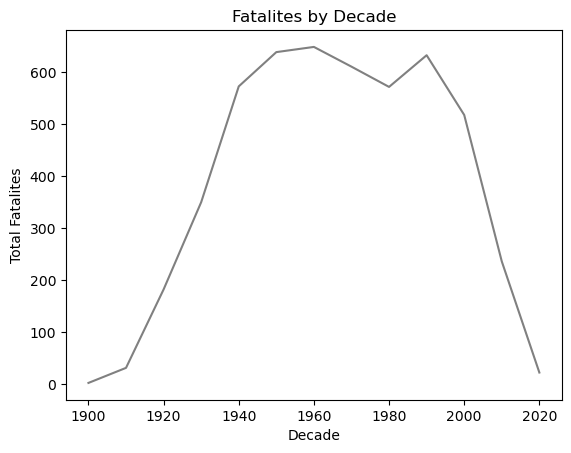

In [47]:
sns.lineplot(x=Fatalies_by_decade.index, y='Total_Fatalites', data=Fatalies_by_decade, color="grey")
plt.xlabel('Decade')
plt.ylabel('Total Fatalites')
plt.title('Fatalites by Decade')
plt.show()


### Ac_Type involved in more accidents

In [48]:
AC_Type_c = df.groupby("AC_Type").size().reset_index(name='AC_Type_c')
AC_Type_c = AC_Type_c.sort_values(by='AC_Type_c', ascending=False)
AC_Type_top = AC_Type_c.head(10)
AC_Type_top

,AC_Type,AC_Type_c
1152,Douglas DC-3,333
2430,de Havilland Canada DHC-6 Twin Otter 300,84
1064,Douglas C-47A,71
1053,Douglas C-47,64
1204,Douglas DC-4,41
2379,Yakovlev YAK-40,35
166,Antonov AN-26,34
1609,Junkers JU-52/3m,30
1221,Douglas DC-6B,27
1089,Douglas C-47B,27


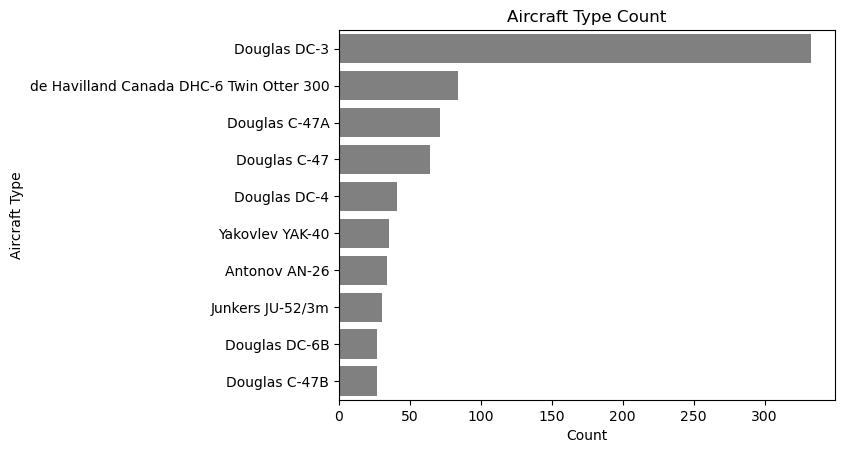

In [49]:
sns.barplot(x='AC_Type_c', y='AC_Type', data=AC_Type_top, orient='h', color='grey')
plt.ylabel('Aircraft Type')
plt.xlabel('Count')
plt.title('Aircraft Type Count')
plt.show()

### add manufacturer column

In [50]:
def extract_manufacturer(ac_type):
    return ac_type.split(" ")[0]
df['manufacturer'] = df['AC_Type'].apply(extract_manufacturer)

In [51]:
for i, row in df.iterrows():
    if "de" in row["manufacturer"]:
        df.loc[i,"manufacturer"] += " Havilland Canada"
df.tail(15)

,Date,Time,Location,Operator,Route,AC_Type,Summary,Passengers_Aboard,Crew_Aboard,Aboard_Aircraft,Passengers_Fatalities,Crew_Fatalities,Aboard_Fatalities,Ground_Fatalities,Total_Fatalites,Survivors,year,Decade,manufacturer
5048,2021-03-02,17:05:00,"Pieri, Sudan",South Sudan Supreme Airlines,Pieri - Yuai,Let L-410UVP-E,One of the engines on the aircraft failed 10 m...,8.0,2.0,10.0,8.0,2.0,10.0,0.0,10.0,0.0,2021,2020,Let
5049,2021-03-28,18:35:00,"Near Butte, Alaska",Soloy Helicopters,Sightseeing Charter,Eurocopter AS350B3 Ecureuil,The sightseeing helicopter crashed after missi...,5.0,1.0,6.0,4.0,1.0,5.0,0.0,5.0,1.0,2021,2020,Eurocopter
5050,2021-05-21,18:00:00,"Near Kaduna, Nigeria",Military - Nigerian Air Force,Unknown,Beechcraft B300 King Air 350i,"While on final approach, in poor weather condi...",7.0,4.0,11.0,7.0,4.0,11.0,0.0,11.0,0.0,2021,2020,Beechcraft
5051,2021-06-10,08:00:00,"Near Pyin Oo Lwin, Myanmar",Military - Myanmar Air Force,Naypyidaw - Anisakan,Beechcraft 1900D,The plane was carrying military personnel and ...,12.0,2.0,14.0,11.0,1.0,12.0,0.0,12.0,2.0,2021,2020,Beechcraft
5052,2021-07-04,11:30:00,"Patikul, Sulu, Philippines",Military - Philippine Air Force,Cagayan de Oro-Lumbia - Jolo,Lockheed C-130H Hercules,"While attempting to land at Jolo Airport, the ...",88.0,8.0,96.0,NaN,NaN,50.0,3.0,53.0,46.0,2021,2020,Lockheed
5053,2021-07-06,15:00:00,"Palana, Russia",\tKamchatka Aviation Enterprise,Petropavlovsk - Palana,Antonov An 26B-100,The passenger plane crashed into the top of a ...,22.0,6.0,28.0,22.0,6.0,28.0,0.0,28.0,0.0,2021,2020,Antonov
5054,2021-09-12,23:15:00,"Kazachinskoye , Russia",Aeroservice/SiLA,Irkutsk - Kazachinskoye,Let L-410UVP-E20,The aircraft was on it's second approach in he...,14.0,2.0,16.0,3.0,1.0,4.0,0.0,4.0,12.0,2021,2020,Let
5055,2021-12-27,19:14:00,"El Cajon, California",Med Jet,Santa Ana - El Cajon,Learjet 35A,The air ambulance flight was completing a turn...,2.0,2.0,4.0,2.0,2.0,4.0,0.0,4.0,0.0,2021,2020,Learjet
5056,2022-03-22,06:22:00,"Wuzhou, Guangxi, China",\tChina Eastern Airlines,Kunming - Guangzhou,Boeing 737-89P WL,"Flying at 29,098 feet, the jetliner started de...",123.0,9.0,132.0,123.0,9.0,132.0,0.0,132.0,0.0,2022,2020,Boeing
5057,2022-05-29,10:10:00,Near Lete Pass,Tara Air,Pokhara - Jomsom,de Havilland Canada DHC-6 Twin Otter 300,The commuter plane crashed while on a flight t...,19.0,3.0,22.0,19.0,3.0,22.0,0.0,22.0,0.0,2022,2020,de Havilland Canada


In [52]:
AC_man_c = df.groupby("manufacturer").size().reset_index(name='manufacturer_c')
AC_man_c = AC_man_c.sort_values(by='manufacturer_c', ascending=False)
AC_man_c = AC_man_c.head(10)
AC_man_c

,manufacturer,manufacturer_c
114,Douglas,994
58,Boeing,414
194,Lockheed,325
31,Antonov,289
318,de Havilland Canada,253
169,Ilyushin,141
136,Fokker,140
205,McDonnell,127
97,Curtiss,119
295,Tupolev,103


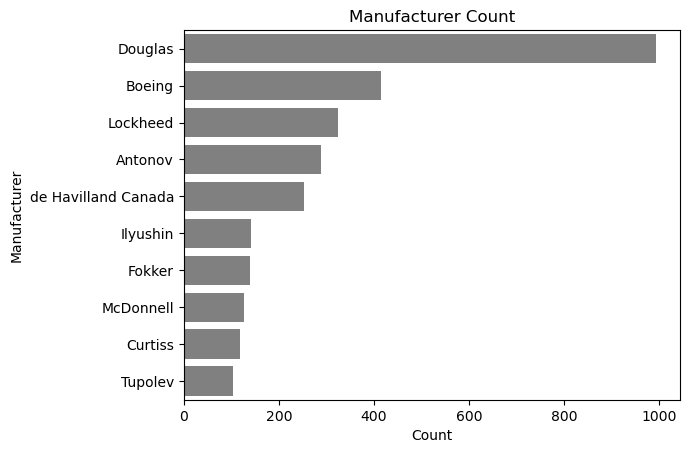

In [53]:
sns.barplot(x='manufacturer_c', y='manufacturer', data=AC_man_c, orient='h', color='grey')
plt.ylabel('Manufacturer')
plt.xlabel('Count')
plt.title('Manufacturer Count')
plt.show()

### Operator involved in more accidents

In [54]:
operator_c = df.groupby("Operator").size().reset_index(name='operator_c')
operator_c = operator_c.sort_values(by='operator_c', ascending=False)
operator_c = operator_c.head(10)
operator_c

,Operator,operator_c
94,Aeroflot,256
1420,Military - U.S. Air Force,142
204,Air France,74
739,Deutsche Lufthansa,63
2167,United Air Lines,44
1430,Military - U.S. Army Air Forces,43
645,China National Aviation Corporation,43
1615,Pan American World Airways,42
370,American Airlines,38
990,Indian Airlines,35


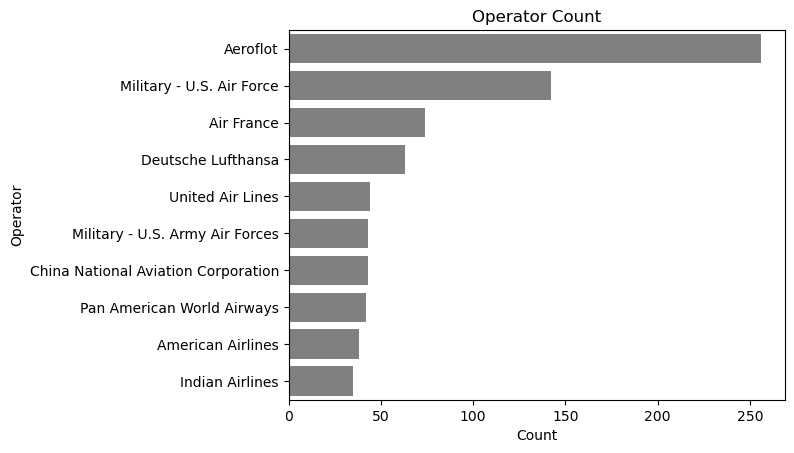

In [55]:
sns.barplot(x='operator_c', y='Operator', data=operator_c, orient='h', color='grey')
plt.ylabel('Operator')
plt.xlabel('Count')
plt.title('Operator Count')
plt.show()

### Types of Routes With More Accidents

In [56]:
Route_c = df.groupby("Route").size().reset_index(name='Route_c')
Route_c = Route_c.sort_values(by='Route_c', ascending=False)
Route_c = Route_c.head(10)
Route_c

,Route,Route_c
3680,Unknown,766
3614,Training,97
3307,Sightseeing,31
3542,Test flight,24
3218,Sao Paulo - Rio de Janeiro,7
3540,Test,6
3002,Rio de Janeiro - Sao Paulo,5
988,Croydon - Paris,4
1456,Huambo - Luanda,4
1063,Demonstration,4


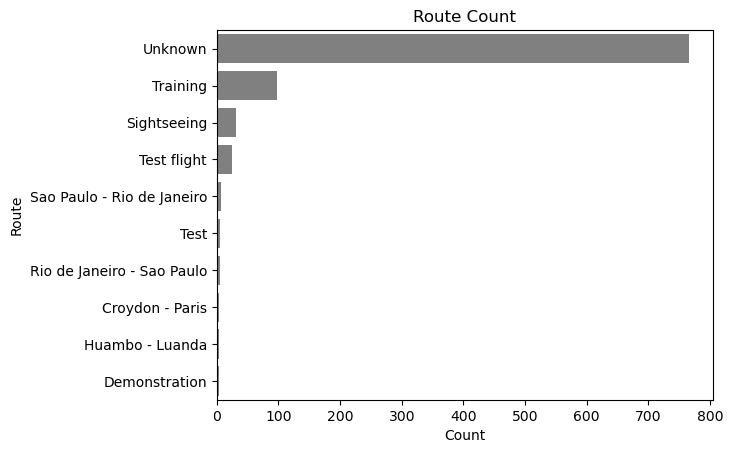

In [57]:
sns.barplot(x='Route_c', y='Route', data=Route_c, orient='h', color='grey')
plt.ylabel('Route')
plt.xlabel('Count')
plt.title('Route Count')
plt.show()

### will use this DF for streamlit

In [58]:
dfstreamlit = df[["Decade","year", "Date", "Time", "Location", "Operator", "Route", "AC_Type", "manufacturer", "Summary", "Passengers_Aboard", "Crew_Aboard", "Aboard_Aircraft", "Passengers_Fatalities", "Crew_Fatalities", "Aboard_Fatalities", "Ground_Fatalities", "Total_Fatalites", "Survivors"]]
dfstreamlit


,Decade,year,Date,Time,Location,Operator,Route,AC_Type,manufacturer,Summary,Passengers_Aboard,Crew_Aboard,Aboard_Aircraft,Passengers_Fatalities,Crew_Fatalities,Aboard_Fatalities,Ground_Fatalities,Total_Fatalites,Survivors
0,1900,1908,1908-09-17,17:18:00,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,Wright,"During a demonstration flight, a U.S. Army fly...",1.0,1.0,2.0,1.0,0.0,1.0,0.0,1.0,1.0
1,1900,1909,1909-09-07,NaN,"Juvisy-sur-Orge, France",Unknown,Air show,Wright Byplane,Wright,Eugene Lefebvre was the first pilot to ever be...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,1910,1912,1912-07-12,06:30:00,"Atlantic City, New Jersey",Military - U.S. Navy,Test flight,Dirigible,Dirigible,First U.S. dirigible Akron exploded just offsh...,0.0,5.0,5.0,0.0,5.0,5.0,0.0,5.0,0.0
3,1910,1913,1913-08-06,NaN,"Victoria, British Columbia, Canada",Private,Unknown,Curtiss seaplane,Curtiss,The first fatal airplane accident in Canada oc...,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
4,1910,1913,1913-09-09,18:30:00,Over the North Sea,Military - German Navy,Unknown,Zeppelin L-1 (airship),Zeppelin,The airship flew into a thunderstorm and encou...,NaN,NaN,20.0,NaN,NaN,14.0,0.0,14.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5058,2020,2022,2022-07-16,22:47:00,"Eleftheroupolis, Greece",Meridian,Nis- Amman,Antonov An-12,Antonov,The cargo plane carrying eight crew members an...,0.0,8.0,8.0,0.0,8.0,8.0,0.0,8.0,0.0
5059,2020,2022,2022-11-06,08:53:00,"Bukoba, Tanzania",Precision Air,Dar es-Salaam -Bukoba,ATR 42-500,ATR,"While on final approach to Bukoba Airport, the...",39.0,39.0,43.0,17.0,2.0,19.0,0.0,19.0,24.0
5060,2020,2022,2022-11-18,15:11:00,"Lima, Peru",LATAM,Lima - Juliaca,Airbus 320-271N,Airbus,The Airbus A320 collided with a fire truck whi...,102.0,6.0,108.0,0.0,0.0,0.0,2.0,2.0,108.0
5061,2020,2022,2022-11-21,10:15:00,"Medellín, Colombia",AeroPaca SAS,Medellín - Pizarro,Piper PA-31-350 Navajo Chieftain,Piper,The plane was chartered to carry a team of six...,6.0,2.0,8.0,6.0,2.0,8.0,0.0,8.0,0.0
